# Problem 1

Theorem 1:(Glivenko-Cantelli)
As $n\rightarrow \inf$, $D_{n}\rightarrow 0$ in probability. 

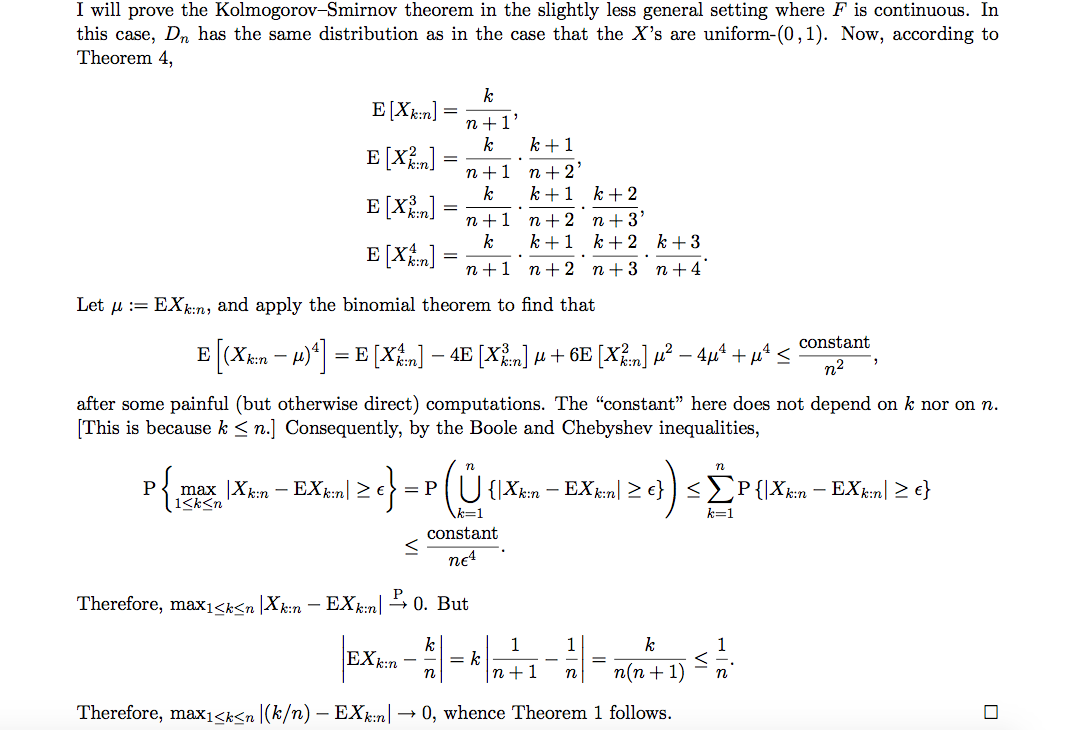

# problem 2

           Date    Return
0    2012-05-21 -0.109861
1    2012-05-22 -0.089039
2    2012-05-23  0.032258
3    2012-05-24  0.032187
4    2012-05-25 -0.033909
5    2012-05-29 -0.096208
6    2012-05-30 -0.022538
7    2012-05-31  0.050018
8    2012-06-01 -0.063514
9    2012-06-04 -0.029581
10   2012-06-05 -0.038290
11   2012-06-06  0.036335
12   2012-06-07 -0.018650
13   2012-06-08  0.030027
14   2012-06-11 -0.003321
15   2012-06-12  0.014439
16   2012-06-13 -0.004745
17   2012-06-14  0.037404
18   2012-06-15  0.060799
19   2012-06-18  0.046651
20   2012-06-19  0.015918
21   2012-06-20 -0.009715
22   2012-06-21  0.007595
23   2012-06-22  0.038002
24   2012-06-25 -0.029955
25   2012-06-26  0.032439
26   2012-06-27 -0.026284
27   2012-06-28 -0.026993
28   2012-06-29 -0.008291
29   2012-07-02 -0.010611
...         ...       ...
1222 2017-03-30 -0.001682
1223 2017-03-31 -0.002528
1224 2017-04-03  0.001619
1225 2017-04-04 -0.003866
1226 2017-04-05  0.000847
1227 2017-04-06 -0.004794
1228 2017-04

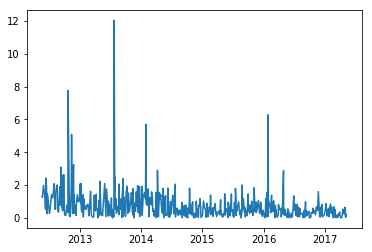

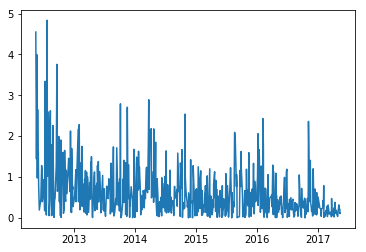

degree of freedom= 1


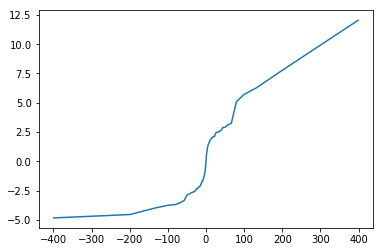

degree of freedom= 2


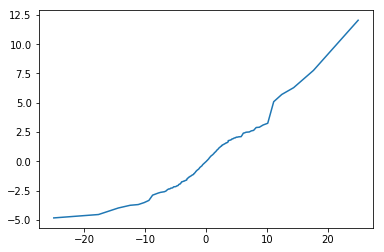

degree of freedom= 3


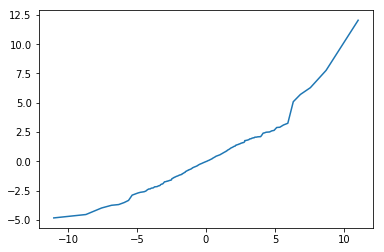

degree of freedom= 4


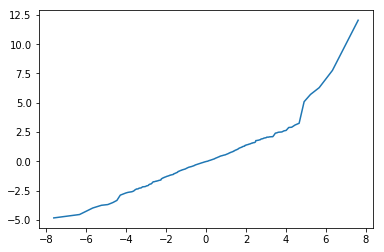

degree of freedom= 5


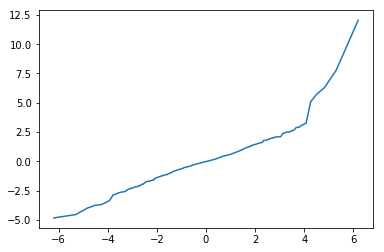

degree of freedom= 6


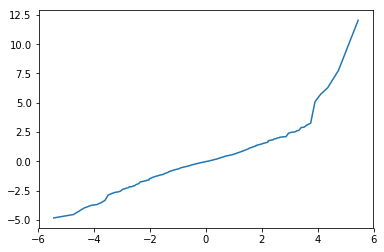

degree of freedom= 7


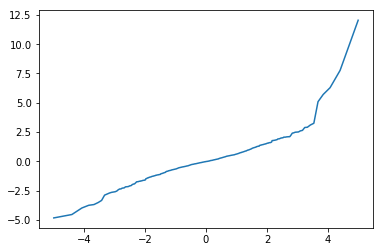

degree of freedom= 8


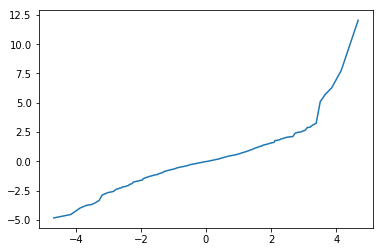

degree of freedom= 9


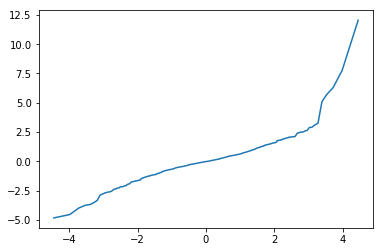

In [2]:

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import pandas_datareader as pdr
from datetime import datetime
import statistics 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
bp = pdr.get_data_yahoo(symbols='FB', start=datetime(2007, 1, 2), end=datetime(2017, 5, 11))


Date = bp.index
#print(bp)m

re = []
f = 1
mu = 0
for i in range(1, len(Date)):
    #day1 = Date[i].date()
    #day1 = Date[i-1].date()
    p2 = bp.iloc[i-1]['Close']
    p1 = bp.iloc[i]['Close']
    re.append((p1-p2)/p2)
Date = Date[1:]
df = pd.DataFrame({'Date':Date,'Return':re})

print(df)
print('standard deviation=',statistics.stdev(re))
print('average return=',np.average(re))

sd = statistics.stdev(re)
ar = np.average(re)


sre = [(df.iloc[j]['Return'] - ar) / sd for j in range(0,len(Date))]
#sre = []
#for j in range(len(Date)-1,-1,-1):
#    sre = (df.iloc[j]['Return'] - ar) / sd
sre2 = pd.DataFrame({'Date':Date, 'Standard Return':sre})
#print(sre)
print(sre2)

positive = sre2[sre2['Standard Return'] > 0].dropna()
print(positive)

negative = sre2[sre2['Standard Return'] < 0].dropna()
print(negative)


plt.plot(positive['Date'],positive['Standard Return'])
plt.show()

plt.plot(negative['Date'],-negative['Standard Return'])
plt.show()

#scipy.stats.probplot(positive['Standard Return'],sparams=(),dist='norm',fit=True, plot=None, rvalue=False)
# I decide the shape parameter of student t
N = len(sre2['Date'])
y = sorted(sre2['Standard Return'])
for df in range(1,10):
    quantiles = [scipy.stats.t.ppf(i/(N+1),df) for i in range(1,N+1)]
    print('degree of freedom=',df)
    plt.plot(quantiles,y)
    plt.show()
#scipy.stats.t()
#scipy.stats.probplot(positive['Standard Return'], dist="t", plot=pylab)
#pylab.show()

## Thus, when the degree of freedom is equal to 2, we can get the best result.

           Date    Return
0    2010-07-17 -0.423229
1    2010-07-18  0.062376
2    2010-07-19  0.081081
3    2010-07-20 -0.056432
4    2010-07-21  0.568515
5    2010-07-22 -0.193548
6    2010-07-23  0.148148
7    2010-07-24  0.080000
8    2010-07-25 -0.098214
9    2010-07-26 -0.066667
10   2010-07-27  0.018676
11   2010-07-28 -0.157368
12   2010-07-29  0.114833
13   2010-07-30 -0.075903
14   2010-07-31  0.110475
15   2010-08-01  0.018333
16   2010-08-02  0.000000
17   2010-08-03  0.052632
18   2010-08-04 -0.065574
19   2010-08-05 -0.020867
20   2010-08-06  0.055932
21   2010-08-07 -0.031199
22   2010-08-08 -0.142254
23   2010-08-09  0.014286
24   2010-08-10  0.044776
25   2010-08-11 -0.042857
26   2010-08-12  0.085271
27   2010-08-13 -0.037313
28   2010-08-14  0.026191
29   2010-08-15 -0.003206
...         ...       ...
2461 2017-04-12  0.030888
2462 2017-04-13 -0.000960
2463 2017-04-14  0.000289
2464 2017-04-15  0.000161
2465 2017-04-16 -0.014414
2466 2017-04-17 -0.010016
2467 2017-04

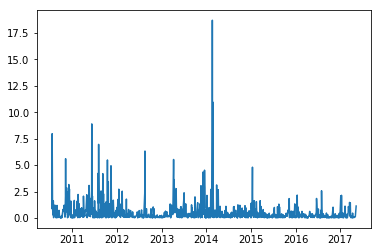

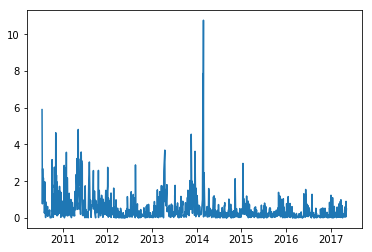

degree of freedom= 1


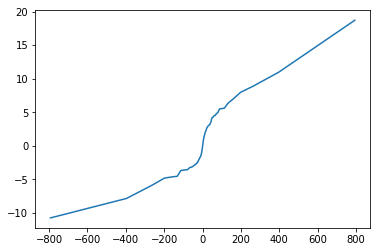

degree of freedom= 2


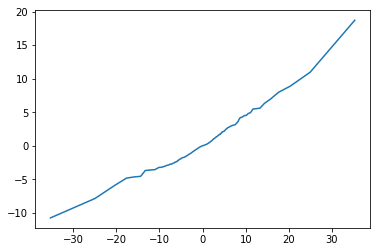

degree of freedom= 3


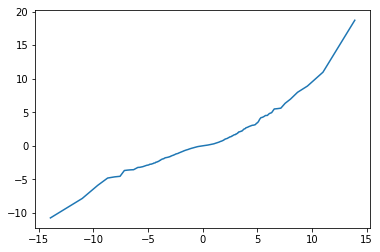

degree of freedom= 4


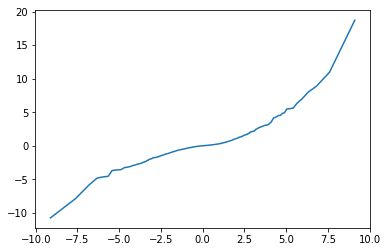

degree of freedom= 5


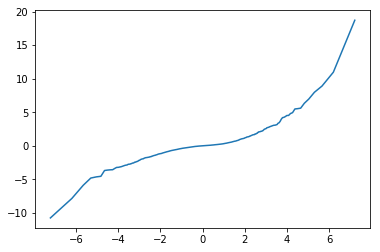

degree of freedom= 6


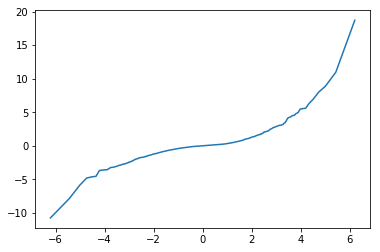

degree of freedom= 7


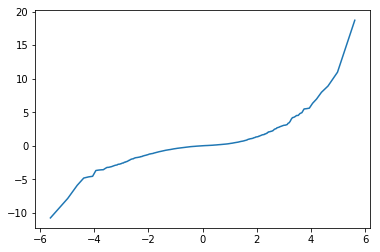

degree of freedom= 8


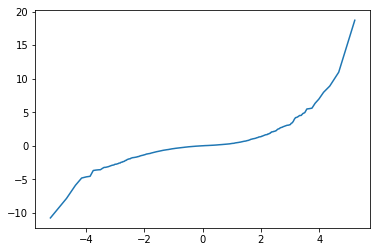

degree of freedom= 9


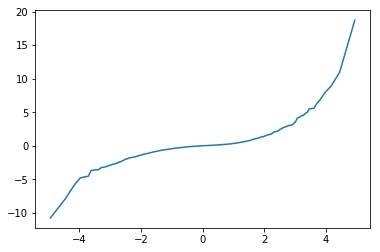

In [5]:

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import pandas_datareader as pdr
from datetime import datetime
import statistics 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
bp = pdr.get_data_yahoo(symbols='BTC-USD', start=datetime(2007, 1, 2), end=datetime(2017, 5, 11))


Date = bp.index
#print(bp)m

re = []
f = 1
mu = 0
for i in range(1, len(Date)):
    #day1 = Date[i].date()
    #day1 = Date[i-1].date()
    p1 = bp.iloc[i-1]['Close']
    p2 = bp.iloc[i]['Close']
    re.append((p1-p2)/p2)
Date = Date[1:]
df = pd.DataFrame({'Date':Date,'Return':re})

print(df)
print('standard deviation=',statistics.stdev(re))
print('average return=',np.average(re))

sd = statistics.stdev(re)
ar = np.average(re)


sre = [(df.iloc[j]['Return'] - ar) / sd for j in range(0,len(Date))]
#sre = []
#for j in range(len(Date)-1,-1,-1):
#    sre = (df.iloc[j]['Return'] - ar) / sd
sre3 = pd.DataFrame({'Date':Date, 'Standard Return':sre})
#print(sre)
print(sre3)

positive = sre3[sre3['Standard Return'] > 0].dropna()
print(positive)

negative = sre3[sre3['Standard Return'] < 0].dropna()
print(negative)


plt.plot(positive['Date'],positive['Standard Return'])
plt.show()

plt.plot(negative['Date'],-negative['Standard Return'])
plt.show()

#scipy.stats.probplot(positive['Standard Return'],sparams=(),dist='norm',fit=True, plot=None, rvalue=False)
# I decide the shape parameter of student t
N = len(sre3['Date'])
y = sorted(sre3['Standard Return'])
for df in range(1,10):
    quantiles = [scipy.stats.t.ppf(i/(N+1),df) for i in range(1,N+1)]
    print('degree of freedom=',df)
    plt.plot(quantiles,y)
    plt.show()
#scipy.stats.t()
#scipy.stats.probplot(positive['Standard Return'], dist="t", plot=pylab)
#pylab.show()

## Thus, the best degree of freedom for bitcoin is bewteen 2 and 3

# Prob 3:

In [30]:
#Facebook
import math
import scipy
import scipy.stats
test = sorted(sre2['Standard Return'])
N = len(test)

def func_f(t,df):
    return scipy.stats.t.cdf(t,df, loc = 0, scale =1)

for i in range(20,40):
    df = i/10
    AD = -N-sum([(2*(i+1)-1)/N*(math.log(func_f(test[i],df)) + math.log(1-func_f(test[N-i-1],df)) ) for i in range(N)])
    print(df, AD)

2.0 54.97392269301895
2.1 53.18399619462389
2.2 51.557746599882876
2.3 50.074764055951164
2.4 48.717807246485336
2.5 47.47222134634944
2.6 46.325478435829154
2.7 45.26681152610399
2.8 44.28692083066585
2.9 43.37773629052799
3.0 42.53222426427101
3.1 41.744229160191026
3.2 41.008342914083414
3.3 40.31979680809036
3.4 39.67437132881332
3.5 39.06832067881396
3.6 38.498309258754034
3.7 37.96135798115279
3.8 37.454798700043966
3.9 36.976235372568


In [46]:
#bitcoin
import math
import scipy
import scipy.stats
test = sorted(sre3['Standard Return'])
N = len(test)

def func_f(t,df):
    return scipy.stats.t.cdf(t,df, loc = 0, scale =1)

for i in range(20,40):
    df = i/10
    AD = -N-sum([(2*(i+1)-1)/N*(math.log(func_f(test[i],df)) + math.log(1-func_f(test[N-i-1],df)) ) for i in range(N)])
    print(df, AD)

2.0 258.8775837968592
2.1 255.58700367098254
2.2 252.5837431421637
2.3 249.8330321327444
2.4 247.3053845073473
2.5 244.97564303423042
2.6 242.82222272208037
2.7 240.8265062839896
2.8 238.97235737491337
2.9 237.24572581218627
3.0 235.63432522785024
3.1 234.12736819426527
3.2 232.7153472813634
3.3 231.3898530688307
3.4 230.14342207882328
3.5 228.96940907835506
3.6 227.8618793421888
3.7 226.81551735116773
3.8 225.82554909236796
3.9 224.8876756692939
